# Creating Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
 lexical_fields = { 'inflation with economic terms': ['inflation', 'hyperinflation', 'deflation', 'stagflation', 'price index',
                                      'monetary policy', 'purchasing power','deflationary', 'anti-inflationary', 'anti-deflationary'],

    'expensive': ['Expensive', 'expensive', 'prohibitive', 'costly', 'high', 'exorbitant', 'unaffordable', 'consequential',
                  'inaccessible', 'excessive', 'abnormal', 'expensive', 'rip-off', 'rip-off', 'ruinous', 'outrageous', 'out of reach',
                  'roundabout', 'inconceivable', 'prohibitive'],

    'cheap': ['Low', 'modest', 'advantageous','discounted', 'unbeatable', 'derisory','attractive', 'bargain', 'bargain price',
              'attractive', 'bargain', 'affordable','reasonable', 'competitive','accessible', 'acceptable', 'normal',
              'fair', 'interesting', 'suitable','negligible'],

    'prices_costs': ['price', 'cost', 'expense', 'fee', 'charge', 'rate', 'tariff','sale', 'purchase', 'lease', 'fee',
                     'subscription', 'bill', 'cost', 'charge', 'pay', 'rate', 'sell', 'quote', 'payment','discount'],

    'statistical_institutions': ['Bureau of Labor Statistics', 'Consumer Price Index', 'Federal Reserve',
                                  'ECB', 'central bank', 'Banque de France', 'INSEE', 'FED', 'rate', 'interest rate', 'Central Bank of Ireland',
                                 'Bank of England', 'Bank', 'Investment Institution'],

    'additional_keywords': ['economy', 'market', 'value', 'money', 'finance',]
}

In [ ]:
import os
import json
import gzip  # Import gzip for handling .gz (gzipped) files

# The directory that contains a day's worth of files
json_dir = '/content/gdrive/MyDrive/November 21st 2022'

outfolder = 'output'
if not os.path.exists(outfolder):
    os.makedirs(outfolder)

json_list = []  # List of lists, each sublist has 1 string element = 1 line

# Flatten the 'inflation dictionary' to a list of keywords
keywords = [keyword for sublist in lexical_fields.values() for keyword in sublist]

for path, dirs, files in os.walk(json_dir):
    for f in files:
        if f.endswith('.json') or f.endswith('.gz'):
            json_file = os.path.join(path, f)
            if f.endswith('.gz'):
                with gzip.open(json_file, 'rt', encoding='utf-8') as jf:
                    jfile_list = list(jf)
                    json_list.extend(jfile_list)
            else:
                with open(json_file, 'r', encoding='utf-8') as jf:
                    jfile_list = list(jf)
                    json_list.extend(jfile_list)

print("Finished reading", len(json_list), 'records into list')

filtered_dict = {}
i = 0
for json_str in json_list:
    result = json.loads(json_str)
    tweet_text = result.get('text', '').lower()  # Get text and convert to lower case for case insensitive matching
    if any(keyword.lower() in tweet_text for keyword in keywords):  # Check if any keyword is in the tweet
        filtered_dict[result['id']] = result
    i += 1
    if i % 100000 == 0:
        print('Processed', i, 'records...')

print('Finished processing', i, 'records.')
print('Filtered dictionary with', len(filtered_dict), 'records containing keywords...')

# Define the output file name
outfile = 'filtered_records_with_keywords_v20.json'

# Construct the output path by joining the output folder and the file name
outpath = os.path.join(outfolder, outfile)

print('Writing output for filtered records...')
with open(outpath, 'w', encoding='utf-8') as outf:
    json.dump(filtered_dict, outf)

print('Wrote output file - Done!')

Finished reading 4190001 records into list
Processed 100000 records...
Processed 200000 records...
Processed 300000 records...
Processed 400000 records...
Processed 500000 records...
Processed 600000 records...
Processed 700000 records...
Processed 800000 records...
Processed 900000 records...
Processed 1000000 records...
Processed 1100000 records...
Processed 1200000 records...
Processed 1300000 records...
Processed 1400000 records...
Processed 1500000 records...
Processed 1600000 records...
Processed 1700000 records...
Processed 1800000 records...
Processed 1900000 records...
Processed 2000000 records...
Processed 2100000 records...
Processed 2200000 records...
Processed 2300000 records...
Processed 2400000 records...
Processed 2500000 records...
Processed 2600000 records...
Processed 2700000 records...
Processed 2800000 records...
Processed 2900000 records...
Processed 3000000 records...
Processed 3100000 records...
Processed 3200000 records...
Processed 3300000 records...
Processed

In [ ]:
import json, csv, os

# Adjust the input file to the new filtered JSON file.
infile = '/content/output/filtered_records_with_keywords_v20.json'

# Load the JSON data directly from the infile, no need to modify the path.
with open(infile, 'r', encoding='utf-8') as json_file:
    twit_data = json.load(json_file)

twit_list = []

# Process the JSON data to extract the needed information.
for k, v in twit_data.items():
    tweet_id = k
    timestamp = v.get('created_at')
    tweet = v.get('text')
    lang = v.get('lang')

    # Adjust the record to match the information you have; note removal of geo-based fields if they're not relevant
    record = [tweet_id, timestamp, tweet, lang,]
    twit_list.append(record)

# Specify the output filename.
outfile = 'inflation_keywords_21st.csv'

# Ensure the output directory exists before writing the file.
output_dir = 'output'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

outpath = os.path.join(output_dir, outfile)

# Write the output CSV file.
with open(outpath, 'w', newline='', encoding='utf-8') as writefile:
    writer = csv.writer(writefile, quoting=csv.QUOTE_ALL, delimiter=',')
    # Adjust the header to match the new record structure
    header = ['tweet_id', 'timestamp', 'tweet', 'lang']
    writer.writerow(header)
    writer.writerows(twit_list)

print('Done!')

Done!


# Merging datasets

In [ ]:
import pandas as pd

# List of CSV file paths you want to combine
file_paths = [
    '/content/filtered_tweets_keywords_1st.csv',
    '/content/filtered_tweets_keywords_2nd.csv',
    '/content/filtered_tweets_keywords_3rd.csv',
    '/content/filtered_tweets_keywords_4th.csv',
    '/content/filtered_tweets_keywords_5th.csv',
    '/content/filtered_tweets_keywords_6th.csv',
    '/content/filtered_tweets_keywords_7th.csv',
    '/content/inflation_keywords_8th.csv',
    '/content/inflation_keywords_9th.csv',
    '/content/inflation_keywords_10th.csv',
    '/content/inflation_keywords_11th.csv',
    '/content/inflation_keywords_12th.csv',
    '/content/inflation_keywords_13th.csv',
    '/content/inflation_keywords_14th.csv',
    '/content/inflation_keywords_15th.csv',
    '/content/inflation_keywords_16th.csv',
    '/content/inflation_keywords_17th.csv',
    '/content/inflation_keywords_18th.csv',
    '/content/inflation_keywords_19th.csv',
    '/content/inflation_keywords_20th.csv',
    '/content/inflation_keywords_21st.csv'
]

# Read each CSV file into a DataFrame and store them in a list
dfs = [pd.read_csv(file_path) for file_path in file_paths]

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# Combine the DataFrames to a new CSV file
combined_df.to_csv('/content/November 2022 combined.csv', index=False)

# Loading Dataset

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/November 2022 combined.csv'
tweets_df = pd.read_csv(file_path)

# Check the first few rows of the dataframe to understand its structure
tweets_df.head()

<ipython-input-8-af021a8dd1cb>:5: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets_df = pd.read_csv(file_path)


,tweet_id,timestamp,tweet,lang
0,1587593300948660224,Tue Nov 01 23:51:53 +0000 2022,@lusttforlifee__ Wadauuu,cy
1,1587593300969918464,Tue Nov 01 23:51:53 +0000 2022,RT @LouisTCostaRica: Estamos a 10 días de escu...,es
2,1587593300965560326,Tue Nov 01 23:51:53 +0000 2022,"RT @hyuckbots: lee 'backbone of nct, main voca...",en
3,1587593300961550336,Tue Nov 01 23:51:53 +0000 2022,RT @billboardcharts: .@BTS_twt's #Jin has the ...,en
4,1587593300974129152,Tue Nov 01 23:51:53 +0000 2022,RT @bravepromote: $30 | 450RB | 1620 PHP \n\n✅...,en


In [ ]:
# Function to check if a tweet contains any of the keywords
def contains_keywords(tweet, keywords):
    # Ensure the tweet is a string
    tweet = str(tweet)
    return any(keyword.lower() in tweet.lower() for keyword in keywords)

# Count the tweets containing each category of keywords
keyword_counts = {category: sum(tweets_df['tweet'].apply(lambda tweet: contains_keywords(tweet, keywords))) for category, keywords in lexical_fields.items()}

keyword_counts

{'inflation with economic terms': 31569,
 'expensive': 262540,
 'cheap': 2572168,
 'prices_costs': 3883360,
 'statistical_institutions': 929542,
 'additional_keywords': 1619635}

In [ ]:
print(tweets_df.shape)

(37208078, 4)


In [ ]:
print(tweets_df.isna().sum())

tweet_id       917504
timestamp    25297253
tweet        25297564
lang         31627292
dtype: int64


In [ ]:
tweets_df = tweets_df.dropna()

In [ ]:
# Function to check if a tweet contains any of the keywords from the lexical fields
def filter_tweets(tweet, fields):
    if isinstance(tweet, str):
        return any(any(keyword in tweet.lower() for keyword in field) for field in fields.values())
    else:
        # If tweet is not a string, we do not consider it for our lexical fields
        return False

In [ ]:
import re
# Apply the adjusted filter function to the DataFrame
filtered_df = tweets_df[tweets_df['tweet'].apply(lambda tweet: filter_tweets(tweet, lexical_fields))]

# Function to identify invalid characters
def contains_invalid_characters(text):
    # Define a set of allowed punctuation characters
    allowed_punctuation = "!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~"
    pattern = r'^[A-Za-z0-9\s' + re.escape(allowed_punctuation) + r']+$'
    return not re.match(pattern, text)

# Apply the function to the 'clean_text' column to create a mask for rows with invalid characters
invalid_mask = filtered_df['tweet'].apply(lambda x: contains_invalid_characters(str(x)))

In [ ]:
# Invert the mask to filter out the invalid rows
clean_df = filtered_df[~invalid_mask]

# Now 'clean_df' contains only rows with valid characters & english language
print(f"Number of rows after removing invalid characters: {len(clean_df)}")

Number of rows after removing invalid characters: 984053


In [ ]:
unique_languages = clean_df['lang'].unique()

print("Unique languages in the 'lang' column:")
for language in unique_languages:
    print(language)

Unique languages in the 'lang' column:
cy
en
pt
fr
es
zxx
tl
hu
is
da
qme
in
qam
und
de
ht
pl
tr
qst
qht
it
lv
vi
lt
et
sl
nl
sv
ro
ca
eu
hi
nan
no
cs
fi


In [ ]:
# Keep only the rows where the 'lang' column is 'en'
df_filtered = clean_df[clean_df['lang'] == 'en']

print(f"Filtered DataFrame with only English ('en') language: {df_filtered} ")

Filtered DataFrame with only English ('en') language:                      tweet_id                       timestamp  \
5         1587593300936105990  Tue Nov 01 23:51:53 +0000 2022   
13        1587593321924403200  Tue Nov 01 23:51:58 +0000 2022   
16        1587593321924661248  Tue Nov 01 23:51:58 +0000 2022   
21        1587593330296520706  Tue Nov 01 23:52:00 +0000 2022   
35        1587593342891720705  Tue Nov 01 23:52:03 +0000 2022   
...                       ...                             ...   
37208058  1594590863832875008  Mon Nov 21 07:17:42 +0000 2022   
37208060  1594590868014788609  Mon Nov 21 07:17:43 +0000 2022   
37208073  1594590889023873024  Mon Nov 21 07:17:48 +0000 2022   
37208076  1594590893217980416  Mon Nov 21 07:17:49 +0000 2022   
37208077  1594590897395888128  Mon Nov 21 07:17:50 +0000 2022   

                                                      tweet lang  
5         Pay $8 to prove you are a person who has $8 ht...   en  
13        RT @CerromeRussell: B

In [ ]:
filtered_file_path = '/content/Nov_2022_Sentiment_EN.csv'
df_filtered.to_csv(filtered_file_path, index=False)

filtered_file_path

'/content/Nov_2022_Sentiment_EN.csv'

In [ ]:
# Load the dataset
file_path = '/content/Nov_2022_Sentiment_EN.csv'
en_df = pd.read_csv(file_path)

# Add sentiment column - Supervised

In [ ]:
from transformers import pipeline
import pandas as pd


# Convert all tweet texts to strings and handle missing values
tweets_df['tweet'] = tweets_df['tweet'].astype(str).fillna('')

# Initialize the sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="siebert/sentiment-roberta-large-english")

# Define the batch processing function
def process_in_batches(tweets, batch_size=1000):
    batch_sentiments = []
    for i in range(0, len(tweets), batch_size):
        batch = tweets[i:i+batch_size]
        # Ensure batch is a list of strings
        batch = [str(tweet) for tweet in batch]
        results = sentiment_pipeline(batch)
        sentiments = [1 if result['label'] == 'POSITIVE' else -1 for result in results]
        batch_sentiments.extend(sentiments)
    return batch_sentiments

# Apply the batch processing function
tweets_df['sentiment'] = process_in_batches(tweets_df['tweet'].tolist(), batch_size=100)

# Add sentiment column - Unsupervised

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Convert all tweet texts to strings and handle missing values
en_df['tweet'] = en_df['tweet'].astype(str).fillna('')

# Initialize the VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to get numerical sentiment
def get_numerical_sentiment(text):
    score = sia.polarity_scores(text)
    # Return a numerical sentiment based on the compound score
    if score['compound'] >= 0.05:
        return 1  # Positive
    elif score['compound'] <= -0.05:
        return -1  # Negative
    else:
        return 0  # Neutral

# Apply the numerical sentiment function to each tweet
en_df['sentiment'] = en_df['tweet'].apply(get_numerical_sentiment)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Save the modified DataFrame to a new CSV file
new_csv_path = '/content/Nov_2022_Sentiment_EN_v1.csv'
en_df.to_csv(new_csv_path, index=False)

print(f"New CSV file saved to: {new_csv_path}")

New CSV file saved to: /content/Nov_2022_Sentiment_EN_v1.csv


## Cleaned Dataset

In [1]:
import pandas as pd
clean_en_df = pd.read_csv("/content/Nov_2022_Sentiment_EN_v1.csv")

In [ ]:
# Check for NaN values in the target variable
print("NaNs in category (before split):", clean_en_df['sentiment'].isnull().sum())

# Here we drop rows with NaN in 'category'
clean_en_df = clean_en_df.dropna(subset=['sentiment'])

NaNs in category (before split): 0


In [ ]:
# Find the number of positive and negative reviews
print('Number of positive and negative reviews: ', clean_en_df.sentiment.value_counts())

# Find the proportion of positive and negative reviews
print('Proportion of positive and negative reviews: ', clean_en_df.sentiment.value_counts() / len(tweets_df))

Number of positive and negative reviews:   1    379629
 0    268260
-1    172070
Name: sentiment, dtype: int64
Proportion of positive and negative reviews:   1    0.010203
 0    0.007210
-1    0.004625
Name: sentiment, dtype: float64


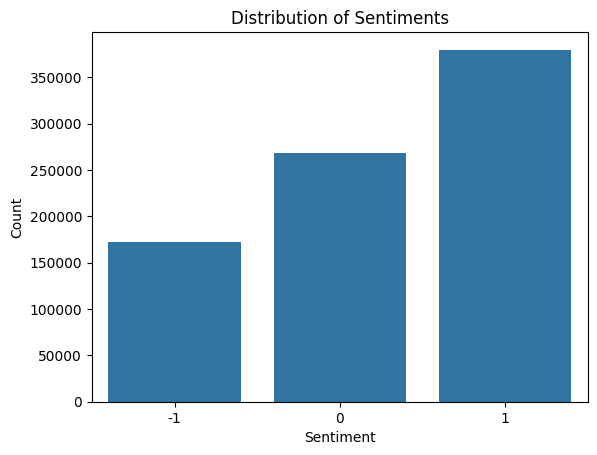

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='sentiment', data = clean_en_df)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# TF-IDF

In [2]:
# Install the library and functions
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
import nltk, re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize


stop = stopwords.words('english')
excluding = ["against", "not", "don", "don't","ain", "aren", "aren't", "couldn", "couldn't",
             "didn", "didn't", "doesn", "doesn't", "hadn", "hadn't", "hasn", "hasn't",
              "haven", "haven't", "isn", "isn't", 'mightn', "mightn't", "mustn", "mustn't",
             "needn", "needn't","shouldn", "shouldn't", "wasn", "wasn't", "weren",
             "weren't", "won", "won't", "wouldn", "wouldn't"]


stop_words = [word for word in stop if word not in excluding]
snow = SnowballStemmer('english')

def process_text(texts):
    final_text_list=[]
    for sent in texts:
        if isinstance(sent, str) == False:
            sent = ""

        filtered_sentence=[]

        sent = sent.lower()
        sent = sent.strip()
        sent = re.sub('\s+', ' ', sent)
        sent = re.compile('<.*?>').sub('', sent)

        for w in word_tokenize(sent):
            if(not w.isnumeric()) and (len(w)>2) and (w not in stop_words):
                filtered_sentence.append(snow.stem(w))
        final_string = " ".join(filtered_sentence)
        final_text_list.append(final_string)

    return final_text_list

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(clean_en_df[["tweet"]],
                                                  clean_en_df["sentiment"],
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=324
                                                 )

In [6]:
print("Processing the tweet fields")
X_train["tweet"] = process_text(X_train["tweet"].tolist())
X_test["tweet"] = process_text(X_test["tweet"].tolist())

Processing the tweet fields


In [ ]:
# Display the number of tweets before and after filtering/cleaning
original_count = tweets_df.shape[0]
filtered_count = clean_df.shape[0]
print(f'Original tweet count: {original_count}')
print(f'Filtered tweet count: {filtered_count}')
print(clean_en_df.head())

Original tweet count: 5580786
Filtered tweet count: 984053
              tweet_id                       timestamp  \
0  1587593300936105990  Tue Nov 01 23:51:53 +0000 2022   
1  1587593321924403200  Tue Nov 01 23:51:58 +0000 2022   
2  1587593321924661248  Tue Nov 01 23:51:58 +0000 2022   
3  1587593330296520706  Tue Nov 01 23:52:00 +0000 2022   
4  1587593342891720705  Tue Nov 01 23:52:03 +0000 2022   

                                               tweet lang  sentiment  
0  Pay $8 to prove you are a person who has $8 ht...   en         -1  
1  RT @CerromeRussell: Build Me Up by Cleo Sol is...   en          1  
2  @ReviewsPossum Out of the way, wench. I'm walk...   en          0  
3  RT @fiihazmii: " Period pain "\n\nWhat men see...   en         -1  
4  Snoop Dogg pays a blunt roller $50k/year meanw...   en         -1  


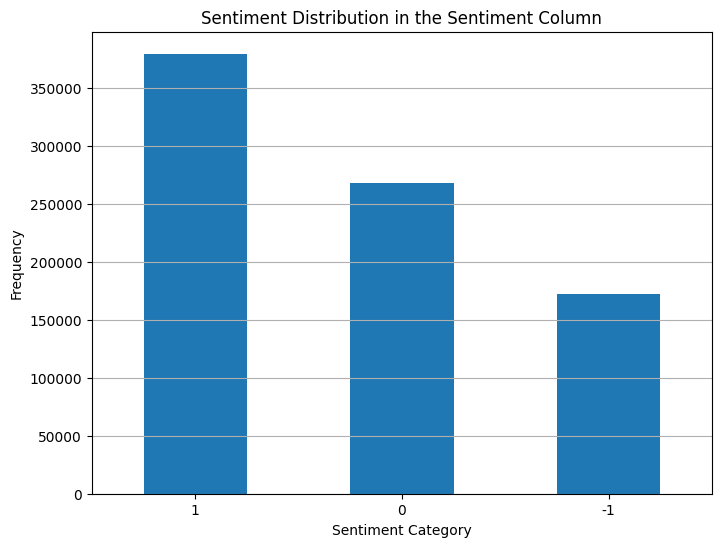

In [7]:
import matplotlib.pyplot as plt
# Calculate the sentiment distribution
sentiment_distribution = clean_en_df['sentiment'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
sentiment_distribution.plot(kind='bar')
plt.title('Sentiment Distribution in the Sentiment Column')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show the plot
plt.show()

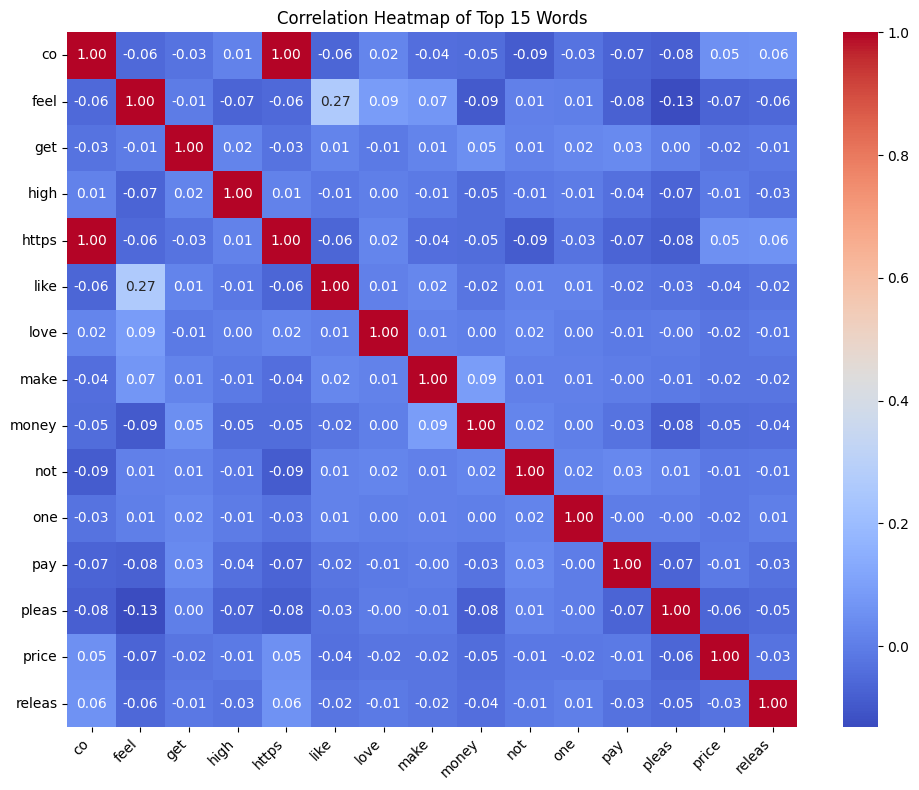

In [11]:
# Process the tweets using the custom function
processed_tweets = process_text(clean_en_df['tweet'].tolist())

# Adjust the CountVectorizer step to work with preprocessed tweets
vectorizer = CountVectorizer(max_features=15)
X = vectorizer.fit_transform(processed_tweets)

# Continue as before
word_array = X.toarray()
word_df = pd.DataFrame(word_array, columns=vectorizer.get_feature_names_out())

# Compute the correlation matrix
corr = word_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap of Top 15 Words")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

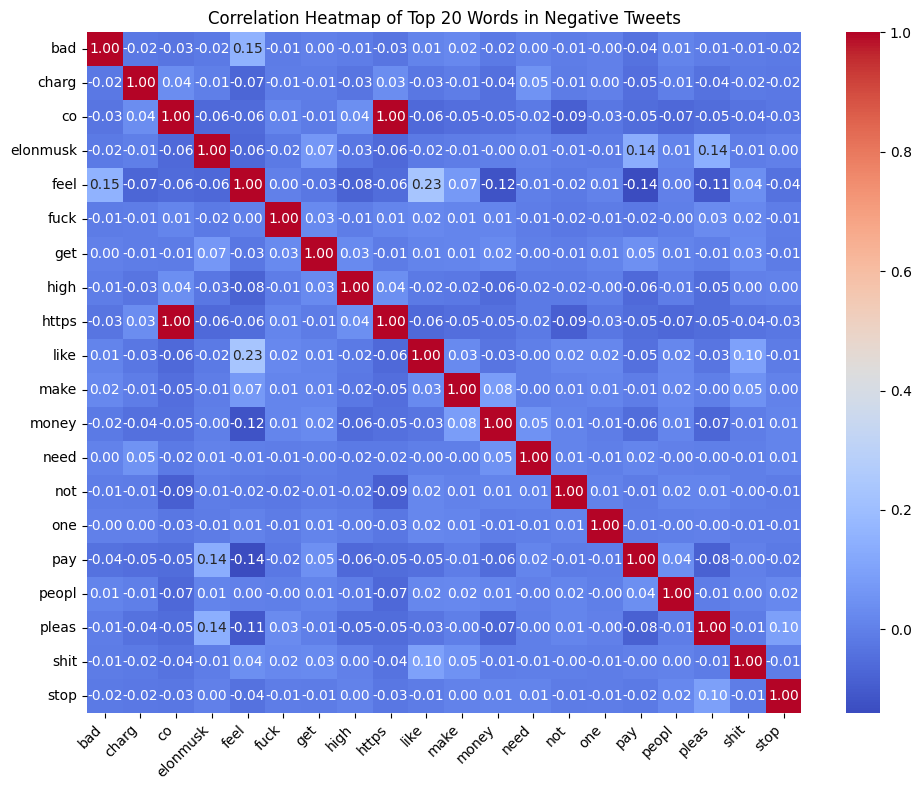

In [10]:
# Filter out only the tweets with negative sentiment
negative_tweets = clean_en_df[clean_en_df['sentiment'] == -1]

# Process the negative tweets using the provided custom stop word function
processed_negative_tweets = process_text(negative_tweets['tweet'].tolist())

# Use CountVectorizer to find the top 20 words in negative tweets
vectorizer = CountVectorizer(max_features=20)
X = vectorizer.fit_transform(processed_negative_tweets)

# Convert to array and then to DataFrame for easier manipulation
word_array = X.toarray()
word_df = pd.DataFrame(word_array, columns=vectorizer.get_feature_names_out())

# Compute the correlation matrix for the top 20 words in negative tweets
corr = word_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap of Top 20 Words in Negative Tweets")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

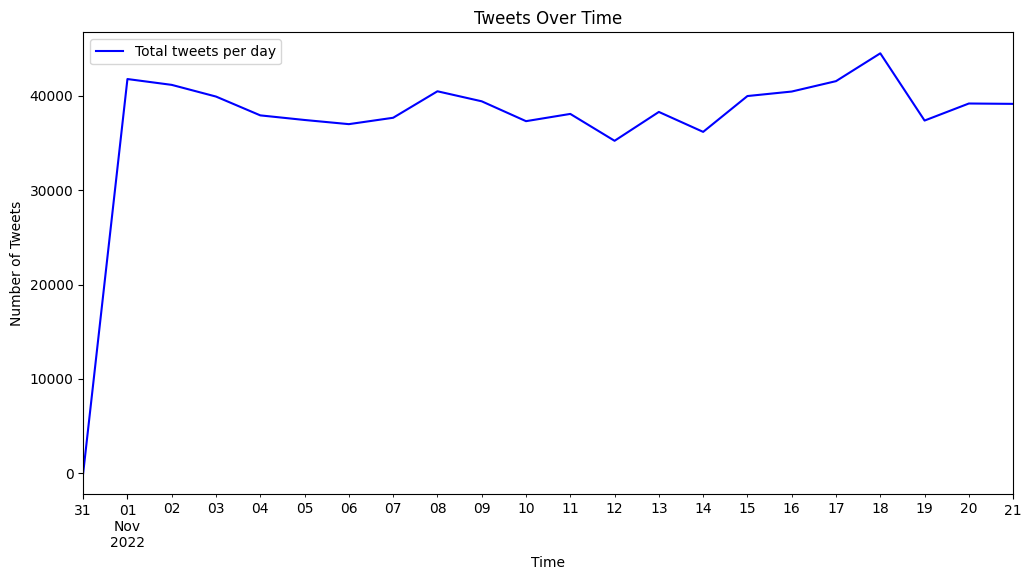

In [ ]:
clean_en_df['timestamp'] = pd.to_datetime(clean_en_df['timestamp'])
clean_en_df.set_index('timestamp', inplace=True)

plt.figure(figsize=(12, 6))
clean_en_df.resample('D').size().plot(label='Total tweets per day', color='blue')
plt.title('Tweets Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Tweets')
plt.legend()
plt.show()

In [ ]:
# Displaying the number of entries in the training and testing sets
print(f"Number of entries in the training set: {len(X_train)}")
print(f"Number of entries in the testing set: {len(X_test)}")

Number of entries in the training set: 655967
Number of entries in the testing set: 163992


In [14]:
# Selecting text features for the model
text_features = ['tweet']

# Defining the target variable for the model
model_target = 'sentiment'

# Base Models

## Logistic Regression Model

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
import gensim
from gensim.models import Word2Vec
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [15]:
text_processor_0 = Pipeline([
    ('text_vect_0', CountVectorizer(binary=True, max_features=150))
])

data_preprocessor = ColumnTransformer([
    ('text_pre_0', text_processor_0, text_features[0])
])


pipeline = Pipeline([
    ('data_preprocessing', data_preprocessor),
    ('logistic_regression', LogisticRegression(penalty = 'l2',
                              C = 0.1))
])

# Visualizing the Pipeline
from sklearn import set_config
set_config(display='diagram')
pipeline

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('text_pre_0',
                                                  Pipeline(steps=[('text_vect_0',
                                                                   CountVectorizer(binary=True,
                                                                                   max_features=150))]),
                                                  'tweet')])),
                ('logistic_regression', LogisticRegression(C=0.1))])

In [16]:
class_labels = np.unique(y_train)

class_weights = compute_class_weight('balanced', classes=class_labels, y=y_train)

# Creating a dictionary to pass to the model
class_weights_dict = {class_labels[i]: class_weights[i] for i in range(len(class_labels))}

# Assembling the Full Pipeline
pipeline = Pipeline([
    ('data_preprocessing', data_preprocessor),
    ('logistic_regression', LogisticRegression(penalty = 'l2', class_weight=class_weights_dict,
                              C = 0.1, max_iter=1000, solver='saga'))
])

# Visualizing the Pipeline
from sklearn import set_config
set_config(display='diagram')
pipeline

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('text_pre_0',
                                                  Pipeline(steps=[('text_vect_0',
                                                                   CountVectorizer(binary=True,
                                                                                   max_features=150))]),
                                                  'tweet')])),
                ('logistic_regression',
                 LogisticRegression(C=0.1,
                                    class_weight={-1: 1.5871410908756571,
                                                  0: 1.0178173546589209,
                                                  1: 0.7207509811936061},
                                    max_iter=1000, solver='saga'))])

In [17]:
# Fit the Pipeline to training data
pipeline.fit(X_train, y_train.values)

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('text_pre_0',
                                                  Pipeline(steps=[('text_vect_0',
                                                                   CountVectorizer(binary=True,
                                                                                   max_features=150))]),
                                                  'tweet')])),
                ('logistic_regression',
                 LogisticRegression(C=0.1,
                                    class_weight={-1: 1.5871410908756571,
                                                  0: 1.0178173546589209,
                                                  1: 0.7207509811936061},
                                    max_iter=1000, solver='saga'))])

In [18]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Predict the categories of the testing set tweets
test_predictions = pipeline.predict(X_test)

# Printing the Confusion Matrix
print(confusion_matrix(y_test.values, test_predictions))

# Printing the Classification Report
print(classification_report(y_test.values, test_predictions))

# Calculating and Printing the Accuracy
print("Accuracy (validation):", accuracy_score(y_test.values, test_predictions))

[[14743 13747  5813]
 [ 8498 42912  2022]
 [ 9178 16414 50665]]
              precision    recall  f1-score   support

          -1       0.45      0.43      0.44     34303
           0       0.59      0.80      0.68     53432
           1       0.87      0.66      0.75     76257

    accuracy                           0.66    163992
   macro avg       0.64      0.63      0.62    163992
weighted avg       0.69      0.66      0.66    163992

Accuracy (validation): 0.6605200253670911


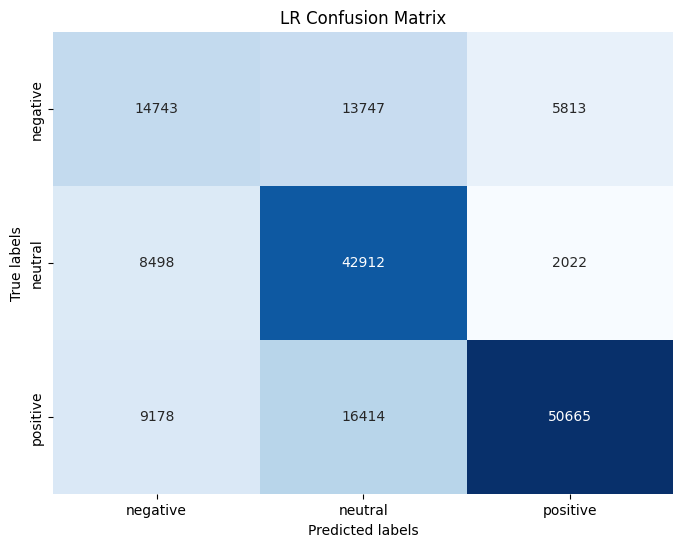

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
cm_1 = confusion_matrix(y_test.values, test_predictions)

def plot_confusion_matrix(conf_matrix, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_1, annot=True, fmt='g', cmap='Blues', cbar=False,
                xticklabels=['negative', 'neutral', 'positive'],
                yticklabels=['negative', 'neutral', 'positive'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()

# Plotting the confusion matrices
plot_confusion_matrix(cm_1, title='LR Confusion Matrix')

## Gradient Boosting Model

In [ ]:
#Gradient Boosting pipeline
gb_pipeline = Pipeline([
    ('data_preprocessing', data_preprocessor),
    ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
])

In [ ]:
# Fit the pipeline to your training data
gb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('text_pre_0',
                                                  Pipeline(steps=[('text_vect_0',
                                                                   TfidfVectorizer(max_features=2500))]),
                                                  'tweet')])),
                ('gb', GradientBoostingClassifier(random_state=42))])

In [ ]:
# Predict the categories of the testing set tweets
test_predictions = gb_pipeline.predict(X_test)

# Printing the Confusion Matrix
print(confusion_matrix(y_test.values, test_predictions))

# Printing the Classification Report
print(classification_report(y_test.values, test_predictions))

# Calculating and Printing the Accuracy
print("Accuracy (validation):", accuracy_score(y_test.values, test_predictions))

[[11927 14261  8115]
 [ 1036 48167  4229]
 [ 2107 14971 59179]]
              precision    recall  f1-score   support

          -1       0.79      0.35      0.48     34303
           0       0.62      0.90      0.74     53432
           1       0.83      0.78      0.80     76257

    accuracy                           0.73    163992
   macro avg       0.75      0.68      0.67    163992
weighted avg       0.75      0.73      0.71    163992

Accuracy (validation): 0.7273098687740865


## KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_pipeline = Pipeline([
    ('data_preprocessing', data_preprocessor),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

# Fit the KNN pipeline to the training data
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('text_pre_0',
                                                  Pipeline(steps=[('text_vect_0',
                                                                   CountVectorizer(binary=True,
                                                                                   max_features=150))]),
                                                  'tweet')])),
                ('knn', KNeighborsClassifier())])

In [ ]:
# Predict the categories of the testing set tweets
test_predictions = knn_pipeline.predict(X_test)

# Printing the Confusion Matrix
print(confusion_matrix(y_test.values, test_predictions))

# Printing the Classification Report
print(classification_report(y_test.values, test_predictions))

# Calculating and Printing the Accuracy
print("Accuracy (validation):", accuracy_score(y_test.values, test_predictions))

[[19234  9229  5840]
 [15213 34311  3908]
 [11261 11239 53757]]
              precision    recall  f1-score   support

          -1       0.42      0.56      0.48     34303
           0       0.63      0.64      0.63     53432
           1       0.85      0.70      0.77     76257

    accuracy                           0.65    163992
   macro avg       0.63      0.64      0.63    163992
weighted avg       0.69      0.65      0.66    163992

Accuracy (validation): 0.6543124054831942


## Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline([
    ('data_preprocessing', data_preprocessor),
    ('random_forest', RandomForestClassifier(n_estimators=100, class_weight='balanced'))
])

# Fit the Random Forest pipeline to the training data
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('text_pre_0',
                                                  Pipeline(steps=[('text_vect_0',
                                                                   CountVectorizer(binary=True,
                                                                                   max_features=150))]),
                                                  'tweet')])),
                ('random_forest',
                 RandomForestClassifier(class_weight='balanced'))])

In [ ]:
# Predict the categories of the testing set tweets
test_predictions = rf_pipeline.predict(X_test)

# Printing the Confusion Matrix
print(confusion_matrix(y_test.values, test_predictions))

# Printing the Classification Report
print(classification_report(y_test.values, test_predictions))

# Calculating and Printing the Accuracy
print("Accuracy (validation):", accuracy_score(y_test.values, test_predictions))

[[17691 11307  5305]
 [ 6921 43612  2899]
 [ 7365 13239 55653]]
              precision    recall  f1-score   support

          -1       0.55      0.52      0.53     34303
           0       0.64      0.82      0.72     53432
           1       0.87      0.73      0.79     76257

    accuracy                           0.71    163992
   macro avg       0.69      0.69      0.68    163992
weighted avg       0.73      0.71      0.71    163992

Accuracy (validation): 0.7131811307868676


### Feature Performance

In [ ]:
vectorizer = rf_pipeline['data_preprocessing'].named_transformers_['text_pre_0'].named_steps['text_vect_0']
feature_names = vectorizer.get_feature_names_out()

# Get feature importances from the random forest model
feature_importances = rf_pipeline['random_forest'].feature_importances_

# Create a dictionary of feature names and their importances
importance_dict = dict(zip(feature_names, feature_importances))

# Sort and print the feature importances
sorted_importances = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)
for feature, importance in sorted_importances:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: pleas, Importance: 0.08725747064626763
Feature: like, Importance: 0.031357368777313564
Feature: love, Importance: 0.03113878283700322
Feature: pay, Importance: 0.027497578409965154
Feature: feel, Importance: 0.01747366807740699
Feature: good, Importance: 0.017117936265751577
Feature: interest, Importance: 0.01521833383061979
Feature: thank, Importance: 0.014475620096656115
Feature: fuck, Importance: 0.013064285511652715
Feature: stop, Importance: 0.012506361669363565
Feature: bad, Importance: 0.01206050266010293
Feature: shit, Importance: 0.011958256858380374
Feature: best, Importance: 0.011459703235111947
Feature: not, Importance: 0.011064068670098147
Feature: https, Importance: 0.010788347590659473
Feature: happi, Importance: 0.010328635579870378
Feature: valu, Importance: 0.010094550458625628
Feature: top, Importance: 0.009743074139452414
Feature: get, Importance: 0.009736333939554073
Feature: want, Importance: 0.009532696670775553
Feature: promot, Importance: 0.00863907743

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

# Function to convert sparse matrix to dense
def to_dense(X):
    return X.toarray()
dense_transformer = FunctionTransformer(to_dense, accept_sparse=True)

nb_pipeline = Pipeline([
    ('data_preprocessing', data_preprocessor),
    ('to_dense', dense_transformer),
    ('naive_bayes', MultinomialNB())
])

# Fit the Naive Bayes pipeline to the training data
nb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('text_pre_0',
                                                  Pipeline(steps=[('text_vect_0',
                                                                   CountVectorizer(binary=True,
                                                                                   max_features=150))]),
                                                  'tweet')])),
                ('to_dense',
                 FunctionTransformer(accept_sparse=True,
                                     func=<function to_dense at 0x7c231226b910>)),
                ('naive_bayes', MultinomialNB())])

In [ ]:
# Predict the categories of the testing set tweets
test_predictions = nb_pipeline.predict(X_test)

# Printing the Confusion Matrix
print(confusion_matrix(y_test.values, test_predictions))

# Printing the Classification Report
print(classification_report(y_test.values, test_predictions))

# Calculating and Printing the Accuracy
print("Accuracy (validation):", accuracy_score(y_test.values, test_predictions))

[[ 9784 11414 13105]
 [ 4319 33944 15169]
 [ 5145 12899 58213]]
              precision    recall  f1-score   support

          -1       0.51      0.29      0.37     34303
           0       0.58      0.64      0.61     53432
           1       0.67      0.76      0.72     76257

    accuracy                           0.62    163992
   macro avg       0.59      0.56      0.56    163992
weighted avg       0.61      0.62      0.61    163992

Accuracy (validation): 0.6216217864286063


# Grid Search

## Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [ ]:
# Define a parameter grid to search for best parameters for everything in the pipeline
param_grid = {
    'data_preprocessing__text_pre_0__text_vect_0__max_features': [5, 25, 50, 100, 150, 200, 250, 500],
    'logistic_regression__C': [0.1, 0.5, 1, 2.5, 5, 7.5, 10]
}

# Create a GridSearchCV object to perform a grid search with the pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

# Fitting the GridSearchCV to the training data
grid_search.fit(X_train, y_train.values)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'data_preprocessing__text_pre_0__text_vect_0__max_features': 500, 'logistic_regression__C': 5}


In [ ]:
param_grid = {
    'data_preprocessing__text_pre_0__text_vect_0__max_features': [500, 750, 1000, 1500, 2000, 5000]
}

# Create a GridSearchCV object to perform a grid search with the pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

# Fitting the GridSearchCV to the training data
grid_search.fit(X_train, y_train.values)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'data_preprocessing__text_pre_0__text_vect_0__max_features': 5000}


In [ ]:
param_grid = {
    'data_preprocessing__text_pre_0__text_vect_0__max_features': [5000, 6000, 8000, 10000]
}

# Create a GridSearchCV object to perform a grid search with the pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

# Fitting the GridSearchCV to the training data
grid_search.fit(X_train, y_train.values)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'data_preprocessing__text_pre_0__text_vect_0__max_features': 10000}


## GB Grid Search

In [ ]:
# Parameter grid for GridSearchCV
param_grid = {
    'gb__n_estimators': [100, 500],
    'gb__learning_rate': [0.01, 0.1],
    'gb__max_depth': [1, 5]
}

# Create a GridSearchCV object to perform a grid search with the pipeline
grid_search = GridSearchCV(gb_pipeline, param_grid, cv=5)

# Fitting the GridSearchCV to the training data
grid_search.fit(X_train, y_train.values)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'gb__learning_rate': 0.1, 'gb__max_depth': 5, 'gb__n_estimators': 500}


## KNN Grid Search

In [ ]:
# Define a parameter grid to search for best parameters for everything in the pipeline
param_grid = {
    'knn__n_neighbors': [1, 3, 5]
}

# Create a GridSearchCV object to perform a grid search with the pipeline
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5)

# Fitting the GridSearchCV to the training data
grid_search.fit(X_train, y_train.values)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'knn__n_neighbors': 5}


## Random Forest Search

In [ ]:
# Define a parameter grid to search for best parameters for everything in the pipeline
rf_param_grid = {
    'random_forest__n_estimators': [10, 50, 100]
}

# Create a GridSearchCV object to perform a grid search with the pipeline
grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5)

# Fitting the GridSearchCV to the training data
grid_search.fit(X_train, y_train.values)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'random_forest__n_estimators': 100}


## Naive Bayes Grid Search

In [ ]:
nb_param_grid = {
    'data_preprocessing__text_pre_0__text_vect_0__max_features': [100, 500, 1000, 2500],
    'naive_bayes': [GaussianNB(), MultinomialNB(), BernoulliNB()]
}

# Create a GridSearchCV object to perform a grid search with the pipeline
grid_search = GridSearchCV(nb_pipeline, nb_param_grid, cv=5)

# Fitting the GridSearchCV to the training data
grid_search.fit(X_train, y_train.values)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'data_preprocessing__text_pre_0__text_vect_0__max_features': 2500, 'naive_bayes': BernoulliNB()}


# Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import randint, uniform

## Logistic Regression

In [ ]:
param_distributions = {
    'logistic_regression__C': loguniform(1e-5, 100.0),  # Regularization strength
    'logistic_regression__penalty': ['l2', 'none'],
}

# Setup RandomizedSearchCV
random_search_logreg = RandomizedSearchCV(
    pipeline, param_distributions=param_distributions,
    n_iter=10, cv=3, verbose=1, n_jobs=-1, random_state=42
)


# Fit the model with random search
random_search_logreg.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found: ", random_search_logreg.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Best parameters found:  {'logistic_regression__C': 2.550264850403285e-05, 'logistic_regression__penalty': 'none'}


## Gradient Boosting

In [ ]:
# Assembling the Full Pipeline with Gradient Boosting
gb_pipeline = Pipeline(steps=[
    ('data_preprocessing', data_preprocessor),
    ('gb', GradientBoostingClassifier(random_state=42))
])

# Parameter distribution for RandomizedSearchCV
param_distributions = {
    'gb__n_estimators': randint(100, 500, 1000),  # Number of boosting stages
    'gb__learning_rate': uniform(0.01, 1),  # Learning rate
    'gb__max_depth': randint(1, 3, 5) # Maximum depth of the individual regression estimators
}

# Setup RandomizedSearchCV
random_search_gb = RandomizedSearchCV(
    gb_pipeline, param_distributions=param_distributions,
    n_iter=7, cv=3, verbose=1, n_jobs=-1, random_state=42
)


# Fit the model with random search
random_search_gb.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found: ", random_search_gb.best_params_)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
Best parameters found:  {'gb__learning_rate': 0.16601864044243653, 'gb__max_depth': 6, 'gb__n_estimators': 1314}


## KNN

In [ ]:
# Assembling the Full Pipeline with KNN
knn_pipeline = Pipeline([
    ('data_preprocessing', data_preprocessor),
    ('knn', KNeighborsClassifier())
])

# Parameter distribution for RandomizedSearchCV
param_distributions = {
    'knn_metric': ['euclidean', 'Manhattan']
    }

# Setup RandomizedSearchCV
random_search_knn = RandomizedSearchCV(
    knn_pipeline, param_distributions=param_distributions,
    n_iter=7, cv=3, verbose=1, n_jobs=-1, random_state=42
)


# Fit the model with random search
random_search_knn.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found: ", random_search_knn.best_params_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=7. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters found:  {'knn__metric': 'euclidean'}


## Random Forest

In [ ]:
# Assembling the Full Pipeline with Random Forest
rf_pipeline = Pipeline(steps=[
    ('data_preprocessing', data_preprocessor),
    ('rf', RandomForestClassifier(random_state=42))
])

# Parameter distribution for RandomizedSearchCV
param_distributions = {
    'rf__n_estimators': randint(100, 1000),  # Number of trees in the forest
    'rf__max_depth': randint(1, 25),  # Maximum depth of the trees
}

# Setup RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    rf_pipeline, param_distributions=param_distributions,
    n_iter=7, cv=3, verbose=1, n_jobs=-1, random_state=42
)

# Fit the model with random search
random_search_rf.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found: ", random_search_rf.best_params_)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
Best parameters found:  {'rf__max_depth': 24, 'rf__n_estimators': 472}


## Naive Bayes

In [ ]:
# Assembling the Full Pipeline with Naive Bayes
nb_pipeline = Pipeline(steps=[
    ('data_preprocessing', data_preprocessor),
    ('nb', MultinomialNB())
])

# Parameter distribution for RandomizedSearchCV
param_distributions = {
    'nb__alpha': uniform(0.0, 1.0)  # Smoothing parameter
}

# Setup RandomizedSearchCV
random_search_nb = RandomizedSearchCV(
    nb_pipeline, param_distributions=param_distributions,
    n_iter=7, cv=3, verbose=1, n_jobs=-1, random_state=42
)

# Fit the model with random search
random_search_nb.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found: ", random_search_nb.best_params_)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
Best parameters found:  {'nb__alpha': 0.3745401188473625}


# Improved Models

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer

## Improved Logistic Regression Model

In [26]:
# Preprocessing the Text Feature
text_processor_0 = Pipeline(steps=[
    ('text_vect_0', TfidfVectorizer(max_features=10000))
])

# Combining All Data Preprocessors
data_preprocessor = ColumnTransformer(transformers=[
    ('text_pre_0', text_processor_0, text_features[0]),
])

# Assembling the Full Pipeline with Multinomial Logistic Regression
pipeline = Pipeline(steps=[
    ('data_preprocessing', data_preprocessor),
    ('logistic_regression', LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, C=2.5, multi_class='multinomial'))
])

In [27]:
# Fit the Pipeline to training data
pipeline.fit(X_train, y_train.values)

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('text_pre_0',
                                                  Pipeline(steps=[('text_vect_0',
                                                                   TfidfVectorizer(max_features=10000))]),
                                                  'tweet')])),
                ('logistic_regression',
                 LogisticRegression(C=2.5, max_iter=1000,
                                    multi_class='multinomial'))])

In [28]:
# Predict the categories of the testing set tweets
test_predictions = pipeline.predict(X_test)

# Printing the Confusion Matrix
print(confusion_matrix(y_test.values, test_predictions))

# Printing the Classification Report
print(classification_report(y_test.values, test_predictions))

# Calculating and Printing the Accuracy
print("Accuracy (validation):", accuracy_score(y_test.values, test_predictions))

[[27754  3014  3535]
 [ 1786 48757  2889]
 [ 2787  2731 70739]]
              precision    recall  f1-score   support

          -1       0.86      0.81      0.83     34303
           0       0.89      0.91      0.90     53432
           1       0.92      0.93      0.92     76257

    accuracy                           0.90    163992
   macro avg       0.89      0.88      0.89    163992
weighted avg       0.90      0.90      0.90    163992

Accuracy (validation): 0.8979096541294698


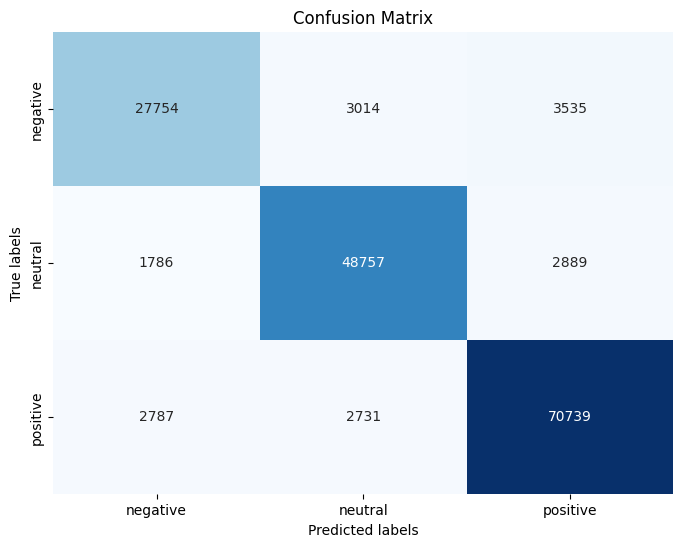

In [29]:
cm = confusion_matrix(y_test.values, test_predictions)

def plot_confusion_matrix(conf_matrix, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
                xticklabels=['negative', 'neutral', 'positive'],
                yticklabels=['negative', 'neutral', 'positive'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()

# Plotting the confusion matrices
plot_confusion_matrix(cm, title='Confusion Matrix')

## Improved GB Model

In [ ]:
# Preprocessing the Text Feature
text_processor_0 = Pipeline(steps=[
    ('text_vect_0', TfidfVectorizer(max_features=2500))
])

# Combining All Data Preprocessors
data_preprocessor = ColumnTransformer(transformers=[
    ('text_pre_0', text_processor_0, text_features[0]),
])

# Assembling the Full Pipeline with Multinomial Logistic Regression
gb_pipeline = Pipeline(steps=[
    ('data_preprocessing', data_preprocessor),
    ('gb', GradientBoostingClassifier(n_estimators=1300, learning_rate=0.15, max_depth=6, random_state=42))
])

In [ ]:
# Fit the pipeline to your training data
gb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('text_pre_0',
                                                  Pipeline(steps=[('text_vect_0',
                                                                   TfidfVectorizer(max_features=2500))]),
                                                  'tweet')])),
                ('gb',
                 GradientBoostingClassifier(learning_rate=0.15, max_depth=6,
                                            n_estimators=1300,
                                            random_state=42))])

In [ ]:
# Predict the categories of the testing set tweets
test_predictions = gb_pipeline.predict(X_test)

# Printing the Confusion Matrix
print(confusion_matrix(y_test.values, test_predictions))

# Printing the Classification Report
print(classification_report(y_test.values, test_predictions))

# Calculating and Printing the Accuracy
print("Accuracy (validation):", accuracy_score(y_test.values, test_predictions))

[[27056  3793  3454]
 [ 1620 49415  2397]
 [ 2332  3612 70313]]
              precision    recall  f1-score   support

          -1       0.87      0.79      0.83     34303
           0       0.87      0.92      0.90     53432
           1       0.92      0.92      0.92     76257

    accuracy                           0.90    163992
   macro avg       0.89      0.88      0.88    163992
weighted avg       0.90      0.90      0.89    163992

Accuracy (validation): 0.8950680521001024


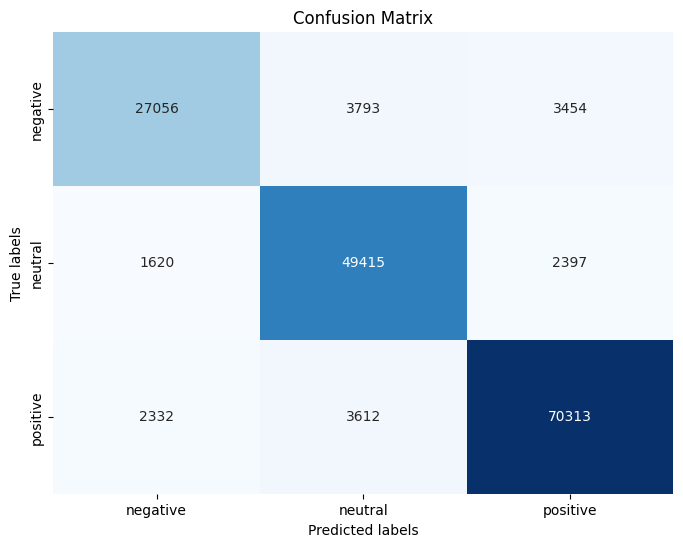

In [ ]:
gb_cm = confusion_matrix(y_test.values, test_predictions)

def plot_confusion_matrix(conf_matrix, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(gb_cm, annot=True, fmt='g', cmap='Blues', cbar=False,
                xticklabels=['negative', 'neutral', 'positive'],
                yticklabels=['negative', 'neutral', 'positive'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()

# Plotting the confusion matrices
plot_confusion_matrix(gb_cm, title='Confusion Matrix')

## Improved KNN Model

In [ ]:
# Preprocessing the Text Feature
text_processor_0 = Pipeline(steps=[
    ('text_vect_0', TfidfVectorizer(max_features=2500))
])

# Combining All Data Preprocessors
data_preprocessor = ColumnTransformer(transformers=[
    ('text_pre_0', text_processor_0, text_features[0]),
])

# Assembling the Full Pipeline with Multinomial Logistic Regression
knn_pipeline = Pipeline(steps=[
    ('data_preprocessing', data_preprocessor),
    ('knn', KNeighborsClassifier(n_neighbors = 5, metric='euclidean'))
])

# Fit the Pipeline to training data
knn_pipeline.fit(X_train, y_train.values)

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('text_pre_0',
                                                  Pipeline(steps=[('text_vect_0',
                                                                   TfidfVectorizer(max_features=2500))]),
                                                  'tweet')])),
                ('knn', KNeighborsClassifier(metric='euclidean'))])

In [ ]:
# Predict the categories of the testing set tweets
test_predictions = knn_pipeline.predict(X_test)

# Printing the Confusion Matrix
print(confusion_matrix(y_test.values, test_predictions))

# Printing the Classification Report
print(classification_report(y_test.values, test_predictions))

# Calculating and Printing the Accuracy
print("Accuracy (validation):", accuracy_score(y_test.values, test_predictions))

[[19563 12263  2477]
 [ 1703 48907  2822]
 [ 2968 20767 52522]]
              precision    recall  f1-score   support

          -1       0.81      0.57      0.67     34303
           0       0.60      0.92      0.72     53432
           1       0.91      0.69      0.78     76257

    accuracy                           0.74    163992
   macro avg       0.77      0.72      0.72    163992
weighted avg       0.79      0.74      0.74    163992

Accuracy (validation): 0.7377920874188985


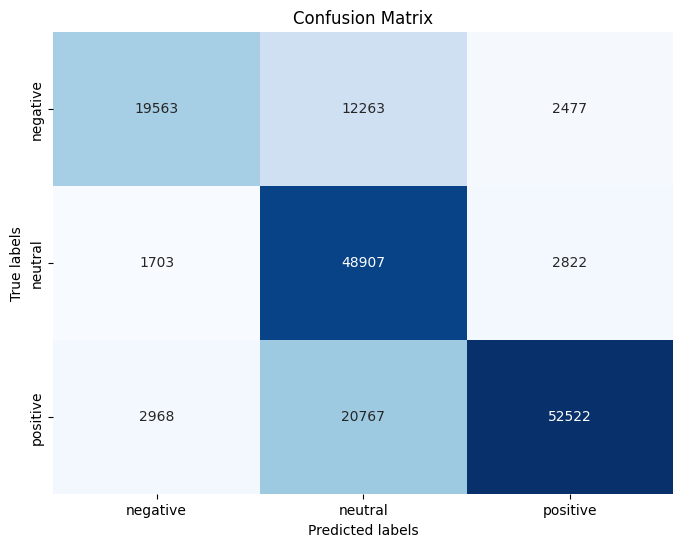

In [ ]:
knn_cm = confusion_matrix(y_test.values, test_predictions)

def plot_confusion_matrix(conf_matrix, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(knn_cm, annot=True, fmt='g', cmap='Blues', cbar=False,
                xticklabels=['negative', 'neutral', 'positive'],
                yticklabels=['negative', 'neutral', 'positive'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()

# Plotting the confusion matrices
plot_confusion_matrix(knn_cm, title='Confusion Matrix')

## Improved Random Forest Model

In [ ]:
# Preprocessing the Text Feature
text_processor_0 = Pipeline(steps=[
    ('text_vect_0', TfidfVectorizer(max_features=2500))
])

# Combining All Data Preprocessors
data_preprocessor = ColumnTransformer(transformers=[
    ('text_pre_0', text_processor_0, text_features[0]),
])

# Assembling the Full Pipeline with Multinomial Logistic Regression
rf_pipeline = Pipeline(steps=[
    ('data_preprocessing', data_preprocessor),
    ('random_forest', RandomForestClassifier(n_estimators=500, class_weight='balanced', max_depth=24))
])

# Fit the Pipeline to training data
rf_pipeline.fit(X_train, y_train.values)

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('text_pre_0',
                                                  Pipeline(steps=[('text_vect_0',
                                                                   TfidfVectorizer(max_features=2500))]),
                                                  'tweet')])),
                ('random_forest',
                 RandomForestClassifier(class_weight='balanced', max_depth=24,
                                        n_estimators=500))])

In [ ]:
# Predict the categories of the testing set tweets
test_predictions = rf_pipeline.predict(X_test)

# Printing the Confusion Matrix
print(confusion_matrix(y_test.values, test_predictions))

# Printing the Classification Report
print(classification_report(y_test.values, test_predictions))

# Calculating and Printing the Accuracy
print("Accuracy (validation):", accuracy_score(y_test.values, test_predictions))

[[20304 10434  3565]
 [ 4731 47077  1624]
 [ 7183 17424 51650]]
              precision    recall  f1-score   support

          -1       0.63      0.59      0.61     34303
           0       0.63      0.88      0.73     53432
           1       0.91      0.68      0.78     76257

    accuracy                           0.73    163992
   macro avg       0.72      0.72      0.71    163992
weighted avg       0.76      0.73      0.73    163992

Accuracy (validation): 0.7258341870335139


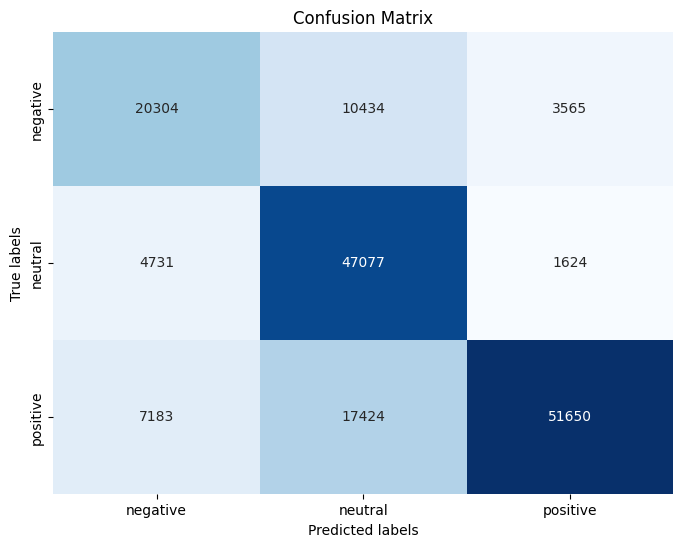

In [ ]:
rf_cm = confusion_matrix(y_test.values, test_predictions)

def plot_confusion_matrix(conf_matrix, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(rf_cm, annot=True, fmt='g', cmap='Blues', cbar=False,
                xticklabels=['negative', 'neutral', 'positive'],
                yticklabels=['negative', 'neutral', 'positive'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()

# Plotting the confusion matrices
plot_confusion_matrix(rf_cm, title='Confusion Matrix')

## Improved Naive Bayes

In [ ]:
# Preprocessing the Text Feature
text_processor_0 = Pipeline(steps=[
    ('text_vect_0', TfidfVectorizer(max_features=2500))
])

# Combining All Data Preprocessors
data_preprocessor = ColumnTransformer(transformers=[
    ('text_pre_0', text_processor_0, text_features[0]),
])

# Function to convert sparse matrix to dense
#def to_dense(X):
    #return X.toarray()
#dense_transformer = FunctionTransformer(to_dense, accept_sparse=True)

nb_pipeline = Pipeline([
    ('data_preprocessing', data_preprocessor),
    #('to_dense', dense_transformer),
    ('naive_bayes', BernoulliNB(alpha=0.4))
])

# Fit the Naive Bayes pipeline to the training data
nb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('text_pre_0',
                                                  Pipeline(steps=[('text_vect_0',
                                                                   TfidfVectorizer(max_features=2500))]),
                                                  'tweet')])),
                ('naive_bayes', BernoulliNB(alpha=0.4))])

In [ ]:
# Predict the categories of the testing set tweets
test_predictions = nb_pipeline.predict(X_test)

# Printing the Confusion Matrix
print(confusion_matrix(y_test.values, test_predictions))

# Printing the Classification Report
print(classification_report(y_test.values, test_predictions))

# Calculating and Printing the Accuracy
print("Accuracy (validation):", accuracy_score(y_test.values, test_predictions))

[[23930  4778  5595]
 [ 4896 42077  6459]
 [ 6384  4983 64890]]
              precision    recall  f1-score   support

          -1       0.68      0.70      0.69     34303
           0       0.81      0.79      0.80     53432
           1       0.84      0.85      0.85     76257

    accuracy                           0.80    163992
   macro avg       0.78      0.78      0.78    163992
weighted avg       0.80      0.80      0.80    163992

Accuracy (validation): 0.7981913751890336


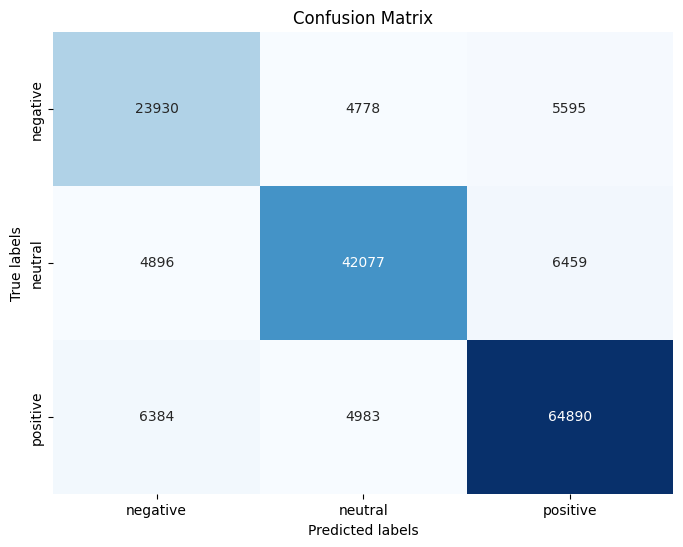

In [ ]:
nb_cm = confusion_matrix(y_test.values, test_predictions)

def plot_confusion_matrix(conf_matrix, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(nb_cm, annot=True, fmt='g', cmap='Blues', cbar=False,
                xticklabels=['negative', 'neutral', 'positive'],
                yticklabels=['negative', 'neutral', 'positive'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()

# Plotting the confusion matrices
plot_confusion_matrix(nb_cm, title='Confusion Matrix')

# Threshold Calibration

In [ ]:
pipeline.predict(X_test)[0:5]

array([1, 0, 1, 0, 1])

In [ ]:
pipeline.predict_proba(X_test)[0:5]

array([[0.32676269, 0.0534377 , 0.61979961],
       [0.04649006, 0.88203614, 0.0714738 ],
       [0.2226146 , 0.00285874, 0.77452666],
       [0.01772461, 0.94615371, 0.03612168],
       [0.01059306, 0.44951735, 0.5398896 ]])

Highest Accuracy on Validation: 0.4650043904580711 , Threshold for the highest Accuracy: 0.0


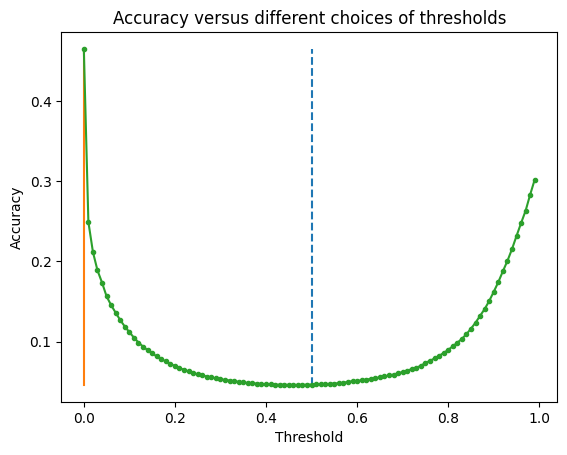

In [ ]:
# Calculate the accuracy using different values for the classification threshold
highest_accuracy = 0
threshold_highest_accuracy = 0

thresholds = np.arange(0,1,0.01)
scores = []
for t in thresholds:
    y_test_other = (pipeline.predict_proba(X_test)[:,1] >= t).astype(float)
    score = accuracy_score(y_test, y_test_other)
    scores.append(score)
    if(score > highest_accuracy):
        highest_accuracy = score
        threshold_highest_accuracy = t
print("Highest Accuracy on Validation:", highest_accuracy, \
      ", Threshold for the highest Accuracy:", threshold_highest_accuracy)

# Plot the accuracy versus different choices of thresholds
plt.plot([0.5, 0.5], [np.min(scores), np.max(scores)], linestyle='--')
plt.plot([threshold_highest_accuracy , threshold_highest_accuracy ], [np.min(scores), np.max(scores)], linestyle='-')

plt.plot(thresholds, scores, marker='.')
plt.title('Accuracy versus different choices of thresholds')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.show()

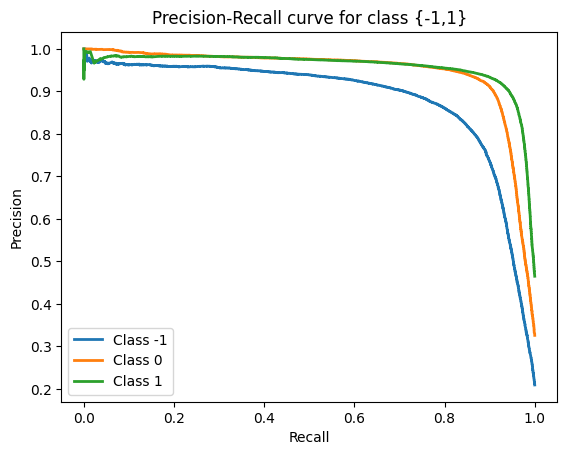

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

# Binarize the output classes
y_test_binarized = label_binarize(y_test, classes=[-1, 0, 1])

test_predictions_probs = pipeline.predict_proba(X_test)

# Calculate precision and recall values for each class
n_classes = y_test_binarized.shape[1]
precision_dict = {}
recall_dict = {}
threshold_dict = {}

for i in range(n_classes):
    precision, recall, thresholds = precision_recall_curve(y_test_binarized[:, i], test_predictions_probs[:, i])
    precision_dict[i-1] = precision
    recall_dict[i-1] = recall
    threshold_dict[i-1] = thresholds

    # Plot precision-recall curve for class i-1 (-1, 0, 1)
    plt.plot(recall, precision, lw=2, label=f'Class {i-1}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve for class {-1,1}')
    plt.legend(loc='best')

plt.show()

# BERT Embeddings

In [ ]:
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertModel
import torch
from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Taking the first 70,000 rows for BERT as the iteraion is too long to fully run
subset_df = clean_en_df.iloc[:50000]

# Split the subset of the dataset into train and test sets
train_data, test_data, train_labels, test_labels = train_test_split(subset_df["tweet"], subset_df["sentiment"], test_size=0.2, random_state=42)

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load BERT tokenizer and model, move to GPU
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = BertModel.from_pretrained("bert-base-uncased").to(device)

# Tokenize and encode the text data, move to GPU
max_length = 128
X_train_tokens = tokenizer(list(train_data), truncation=True, padding=True, max_length=max_length, return_tensors="pt", add_special_tokens=True)
X_test_tokens = tokenizer(list(test_data), truncation=True, padding=True, max_length=max_length, return_tensors="pt", add_special_tokens=True)

# Adjust tensors to move to GPU if using CUDA
X_train_tokens = {key: value.to(device) for key, value in X_train_tokens.items()}
X_test_tokens = {key: value.to(device) for key, value in X_test_tokens.items()}

# Calculate BERT embeddings for the text data
def get_bert_embeddings(tokens):
    embeddings = []
    for i in tqdm(range(tokens['input_ids'].size(0))):
        with torch.no_grad():
            output = bert_model(input_ids=tokens['input_ids'][i].unsqueeze(0),
                                attention_mask=tokens['attention_mask'][i].unsqueeze(0))
        embeddings.append(output.last_hidden_state.mean(dim=1).squeeze().cpu().numpy())
    return embeddings

X_train_bert_embeddings = get_bert_embeddings(X_train_tokens)
X_test_bert_embeddings = get_bert_embeddings(X_test_tokens)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

100%|██████████| 10000/10000 [19:13<00:00,  8.67it/s]


## Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Pipeline steps: StandardScaler -> PCA -> LogisticRegression
logreg_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95, svd_solver='full')),
    ('logreg', LogisticRegression(max_iter=1000))
])

# Define a grid of parameters to search
param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(logreg_pipeline, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train_bert_embeddings, train_labels)

# Display the best parameters
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters found:  {'logreg__C': 0.01}


In [ ]:
# Make predictions on the test data using the best estimator from grid search
predictions = grid_search.best_estimator_.predict(X_test_bert_embeddings)

# Compute accuracy
accuracy = accuracy_score(test_labels, predictions)
print(f'Logistic Regression Accuracy: {accuracy * 100:.2f}%')

Logistic Regression Accuracy: 69.94%


In [ ]:
# Make predictions on the LR test data
predictions = grid_search.best_estimator_.predict(X_test_bert_embeddings)
class_report = classification_report(test_labels, predictions, target_names=['negative', 'neutral','positive'])
lr_conf_matrix = confusion_matrix(test_labels, predictions)

# Print the classification report and confusion matrix
print("Classification Report:")
print(class_report)
print("\nConfusion Matrix:")
print(lr_conf_matrix)

Classification Report:
              precision    recall  f1-score   support

    negative       0.64      0.60      0.62      2158
     neutral       0.69      0.64      0.66      3182
    positive       0.73      0.79      0.76      4660

    accuracy                           0.70     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.70      0.70      0.70     10000


Confusion Matrix:
[[1298  334  526]
 [ 310 2031  841]
 [ 409  586 3665]]


## Gradient Boosting

In [ ]:
# Gradient Boosting pipeline
gb_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('gradient_boosting', GradientBoostingClassifier())
])

# Define a grid of parameters to search over
param_grid = {
    'gradient_boosting__n_estimators': [100, 200],
    'gradient_boosting__learning_rate': [0.1, 1]
}

# Setup the grid search
grid_search_gb = GridSearchCV(gb_pipeline, param_grid, cv=5, verbose=1, n_jobs=-1)

# Fit the model with the grid search
grid_search_gb.fit(X_train_bert_embeddings, train_labels)

# Best parameters
print("Best parameters found for Gradient Boosting: ", grid_search_gb.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters found for Gradient Boosting:  {'gradient_boosting__learning_rate': 1, 'gradient_boosting__n_estimators': 200}


In [ ]:
# Adjusting the Gradient Boosting pipeline with the best parameters
gb_pipeline_best = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('gradient_boosting', GradientBoostingClassifier(n_estimators=200, learning_rate=1))
])

# Fit the model with the specified best parameters
gb_pipeline_best.fit(X_train_bert_embeddings, train_labels)

# After fitting, you can make predictions and evaluate the model as needed
predictions_gb_best = gb_pipeline_best.predict(X_test_bert_embeddings)

# Evaluate the model, for example, by calculating accuracy
accuracy_gb_best = accuracy_score(test_labels, predictions_gb_best)
print(f'Gradient Boosting Accuracy with Best Parameters: {accuracy_gb_best * 100:.2f}%')

Gradient Boosting Accuracy with Best Parameters: 72.02%


In [ ]:
# Compute and print the confusion matrix
class_report = classification_report(test_labels, predictions_gb_best, target_names=['negative', 'neutral','positive'])
cm_gb_best = confusion_matrix(test_labels, predictions_gb_best)

# Print the classification report and confusion matrix
print("Classification Report:")
print(class_report)
print("\nConfusion Matrix:")
print(cm_gb_best)

Classification Report:
              precision    recall  f1-score   support

    negative       0.66      0.62      0.64      2158
     neutral       0.71      0.66      0.69      3182
    positive       0.75      0.81      0.78      4660

    accuracy                           0.72     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.72      0.72      0.72     10000


Confusion Matrix:
[[1342  338  478]
 [ 303 2097  782]
 [ 398  499 3763]]


## KNN

In [ ]:
# Reduce the dimensionality of BERT embeddings to make KNN more efficient and potentially more effective
pca = PCA(n_components=0.95, svd_solver='full')
knn = KNeighborsClassifier()

# This pipeline standardizes the embeddings, reduces dimensionality, and then applies KNN
knn_pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('pca', pca), ('knn', knn)])


# Define a grid of parameters to search over
param_grid = {
    'knn__n_neighbors': [1, 5, 10]
}
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, verbose=1, n_jobs=-1)


grid_search.fit(X_train_bert_embeddings, train_labels)


print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters found:  {'knn__n_neighbors': 1}


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test data using the best estimator from grid search
predictions = grid_search.best_estimator_.predict(X_test_bert_embeddings)

accuracy = accuracy_score(test_labels, predictions)
print(f'KNN Accuracy: {accuracy * 100:.2f}%')

KNN Accuracy: 69.17%


In [ ]:
# Make predictions on the KNN test data
predictions = grid_search.best_estimator_.predict(X_test_bert_embeddings)
class_report = classification_report(test_labels, predictions, target_names=['negative', 'neutral','positive'])
knn_conf_matrix = confusion_matrix(test_labels, predictions)

# Print the classification report and confusion matrix
print("Classification Report:")
print(class_report)
print("\nConfusion Matrix:")
print(knn_conf_matrix)

Classification Report:
              precision    recall  f1-score   support

    negative       0.59      0.61      0.60      2158
     neutral       0.69      0.66      0.67      3182
    positive       0.74      0.75      0.75      4660

    accuracy                           0.69     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.69      0.69      0.69     10000


Confusion Matrix:
[[1313  325  520]
 [ 374 2099  709]
 [ 522  633 3505]]


## Random Forest

In [ ]:
# Initialize PCA and Random Forest Classifier
pca = PCA(n_components=0.95, svd_solver='full')
rf = RandomForestClassifier(random_state=42)

# Create a pipeline
rf_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', pca),
    ('rf', rf)
])

# Define a grid of parameters to search over
param_grid = {
    'rf__n_estimators': [100, 200, 1000],  # Number of trees in the forest
    'rf__max_depth': [None, 10] # Maximum depth of the tree
}

# Configure GridSearchCV
grid_search_rf = GridSearchCV(rf_pipeline, param_grid, cv=5, verbose=1, n_jobs=-1)

# Fit the model with grid search
grid_search_rf.fit(X_train_bert_embeddings, train_labels)

# Best parameters
print("Best parameters found: ", grid_search_rf.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters found:  {'rf__max_depth': None, 'rf__n_estimators': 200}


In [ ]:
# Make predictions on the test data using the best estimator from the grid search
predictions_rf = grid_search_rf.best_estimator_.predict(X_test_bert_embeddings)

# Calculate accuracy
accuracy_rf = accuracy_score(test_labels, predictions_rf)
print(f'Random Forest Accuracy: {accuracy_rf * 100:.2f}%')

Random Forest Accuracy: 69.69%


In [ ]:
# Make predictions on the RF test data
predictions = grid_search_rf.best_estimator_.predict(X_test_bert_embeddings)
class_report = classification_report(test_labels, predictions, target_names=['negative', 'neutral','positive'])
rf_conf_matrix = confusion_matrix(test_labels, predictions)

# Print the classification report and confusion matrix
print("Classification Report:")
print(class_report)
print("\nConfusion Matrix:")
print(rf_conf_matrix)

Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.41      0.56      2158
     neutral       0.85      0.51      0.64      3182
    positive       0.63      0.95      0.76      4660

    accuracy                           0.70     10000
   macro avg       0.79      0.63      0.65     10000
weighted avg       0.76      0.70      0.68     10000


Confusion Matrix:
[[ 888  133 1137]
 [  51 1632 1499]
 [  49  162 4449]]


## Naive Bayes

In [ ]:
# Create a pipeline with a scaler and BernoulliNB classifier
nb_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('nb', BernoulliNB())
])

# Define a grid of parameters to search over for BernoulliNB
param_grid = {
    'nb__alpha': [0.01, 0.1, 1.0, 5]
}

# Setup the grid search to tune the parameters of the Naive Bayes model
grid_search_nb = GridSearchCV(nb_pipeline, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search_nb.fit(X_train_bert_embeddings, train_labels)

# Print the best parameters found
print("Best parameters found: ", grid_search_nb.best_params_)

# Use the best estimator to make predictions
predictions_nb = grid_search_nb.best_estimator_.predict(X_test_bert_embeddings)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters found:  {'nb__alpha': 0.01}


In [ ]:
# Calculate and print the improved accuracy
improved_accuracy_nb = accuracy_score(test_labels, predictions_nb)
print(f'Naive Bayes Accuracy: {improved_accuracy_nb * 100:.2f}%')

Naive Bayes Accuracy: 45.00%


In [ ]:
# Print the classification report
print("Classification Report:\n", classification_report(test_labels, predictions_nb))

# Print the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(test_labels, predictions_nb))

Classification Report:
               precision    recall  f1-score   support

          -1       0.33      0.66      0.44      2158
           0       0.45      0.52      0.48      3182
           1       0.71      0.31      0.43      4660

    accuracy                           0.45     10000
   macro avg       0.50      0.50      0.45     10000
weighted avg       0.54      0.45      0.45     10000

Confusion Matrix:
 [[1429  543  186]
 [1134 1649  399]
 [1729 1509 1422]]
